In [2]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
  

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jaini\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jaini\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt

In [4]:
# Load data
path = 'Articles'
articles = []
for filename in os.listdir(path):
    with open(os.path.join(path, filename), 'r', encoding='utf-8') as f:
        text = f.read()
        articles.append(text)

In [5]:

# Tokenize and preprocess text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [6]:
def preprocess(text):
    # Remove non-alphabetic characters and lowercase text
    text = re.sub('[^A-Za-z]', ' ', text.lower())
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize tokens
    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    return processed_tokens

corpus = [preprocess(article) for article in articles]

In [7]:
# Create dictionary and bag-of-words representation of corpus
dictionary = Dictionary(corpus)
bow_corpus = [dictionary.doc2bow(text) for text in corpus]


Number of documents: 18
Number of unique tokens: 36227
Number of total tokens: 1071874


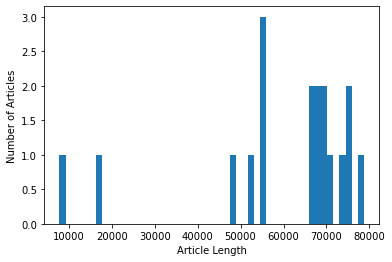

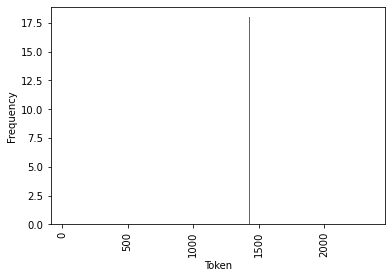

In [8]:
# Summarize corpus
print(f'Number of documents: {len(corpus)}')
print(f'Number of unique tokens: {len(dictionary)}')
print(f'Number of total tokens: {sum(len(text) for text in corpus)}')

# Plot distribution of article lengths
article_lengths = [len(text) for text in corpus]
plt.hist(article_lengths, bins=50)
plt.xlabel('Article Length')
plt.ylabel('Number of Articles')
plt.show()

# Plot frequency of most common tokens
token_frequencies = sorted(dictionary.dfs.items(), key=lambda item: item[1], reverse=True)[:30]
plt.bar([t[0] for t in token_frequencies], [t[1] for t in token_frequencies])
plt.xticks(rotation=90)
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.show()


In [11]:
import gensim
from gensim import corpora, models

# # Load preprocessed corpus
# with open('cleaned_corpus.txt', 'r') as f:
#     corpus = f.readlines()

# # Tokenize documents
# tokenized_docs = [doc.split() for doc in corpus]

# # Create dictionary from tokenized documents
# dictionary = corpora.Dictionary(tokenized_docs)

# # Filter out words that appear in less than 10 documents or more than 50% of documents
# dictionary.filter_extremes(no_below=10, no_above=0.5)

# # Create bag of words representation of documents
# bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train LDA model on bag of words representation of documents
lda_model = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=10, id2word=dictionary, passes=10)

# Print topics and their most common words
for topic_num, topic_words in lda_model.print_topics():
    print("Topic {}: {}".format(topic_num, topic_words))

# Save model output to file
lda_model.save('lda_model')

# Reload saved model
lda_model = models.LdaModel.load('lda_model')


Topic 0: 0.001*"said" + 0.001*"state" + 0.001*"year" + 0.001*"islamic" + 0.001*"trump" + 0.001*"new" + 0.001*"time" + 0.001*"president" + 0.001*"syria" + 0.001*"one"
Topic 1: 0.002*"said" + 0.001*"state" + 0.001*"trump" + 0.001*"time" + 0.001*"islamic" + 0.001*"new" + 0.001*"american" + 0.001*"one" + 0.001*"syria" + 0.001*"president"
Topic 2: 0.007*"state" + 0.006*"obama" + 0.006*"afghanistan" + 0.006*"said" + 0.005*"islamic" + 0.005*"new" + 0.005*"american" + 0.004*"united" + 0.004*"president" + 0.003*"country"
Topic 3: 0.011*"said" + 0.009*"trump" + 0.009*"state" + 0.006*"new" + 0.006*"time" + 0.005*"president" + 0.004*"islamic" + 0.004*"people" + 0.004*"american" + 0.004*"one"
Topic 4: 0.011*"said" + 0.008*"state" + 0.008*"time" + 0.008*"new" + 0.005*"york" + 0.005*"islamic" + 0.005*"american" + 0.004*"one" + 0.004*"trump" + 0.004*"year"
Topic 5: 0.011*"said" + 0.010*"state" + 0.007*"trump" + 0.007*"islamic" + 0.004*"new" + 0.004*"president" + 0.004*"iraq" + 0.004*"year" + 0.004*"fo

In [12]:
# Train LDA model on bag of words representation of documents with different parameters
lda_model_2 = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=5, id2word=dictionary, passes=5)
lda_model_3 = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics=20, id2word=dictionary, passes=15)

# Print topics and their most common words for each model
for model in [lda_model, lda_model_2, lda_model_3]:
    print("Model with {} topics:".format(model.num_topics))
    for topic_num, topic_words in model.print_topics():
        print("Topic {}: {}".format(topic_num, topic_words))


Model with 10 topics:
Topic 0: 0.001*"said" + 0.001*"state" + 0.001*"year" + 0.001*"islamic" + 0.001*"trump" + 0.001*"new" + 0.001*"time" + 0.001*"president" + 0.001*"syria" + 0.001*"one"
Topic 1: 0.002*"said" + 0.001*"state" + 0.001*"trump" + 0.001*"time" + 0.001*"islamic" + 0.001*"new" + 0.001*"american" + 0.001*"one" + 0.001*"syria" + 0.001*"president"
Topic 2: 0.007*"state" + 0.006*"obama" + 0.006*"afghanistan" + 0.006*"said" + 0.005*"islamic" + 0.005*"new" + 0.005*"american" + 0.004*"united" + 0.004*"president" + 0.003*"country"
Topic 3: 0.011*"said" + 0.009*"trump" + 0.009*"state" + 0.006*"new" + 0.006*"time" + 0.005*"president" + 0.004*"islamic" + 0.004*"people" + 0.004*"american" + 0.004*"one"
Topic 4: 0.011*"said" + 0.008*"state" + 0.008*"time" + 0.008*"new" + 0.005*"york" + 0.005*"islamic" + 0.005*"american" + 0.004*"one" + 0.004*"trump" + 0.004*"year"
Topic 5: 0.011*"said" + 0.010*"state" + 0.007*"trump" + 0.007*"islamic" + 0.004*"new" + 0.004*"president" + 0.004*"iraq" + 0.

In [14]:
! pip install pyLDAvis

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.



  Using cached numpy-1.24.2-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


In [15]:
import pyLDAvis.gensim

# Visualize LDA model
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis)

# Save visualization to file
pyLDAvis.save_html(vis, 'lda_vis.html')



c:\Users\jaini\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


# Use below disply to visualise top 30 most relevant terms for topic based on your input value in selected topic also it provides the information for previous topic and next topic

Reference:
1. Topic model visualisation using pyLDAvis https://towardsdatascience.com/topic-model-visualization-using-pyldavis-fecd7c18fbf6

In [16]:
pyLDAvis.display(vis)

In [18]:
! pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


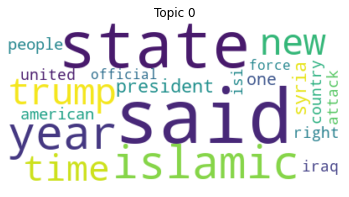

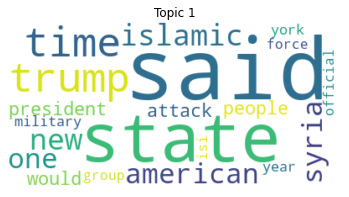

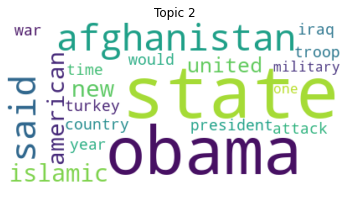

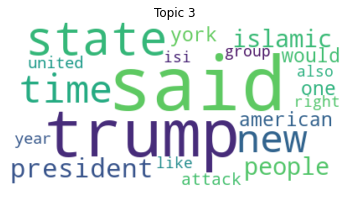

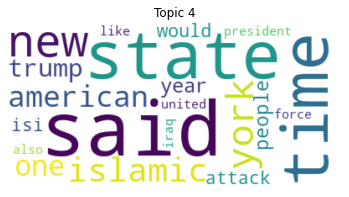

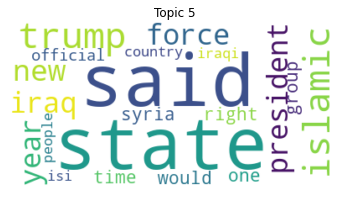

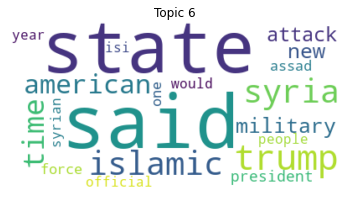

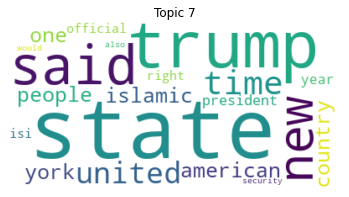

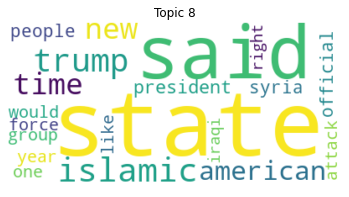

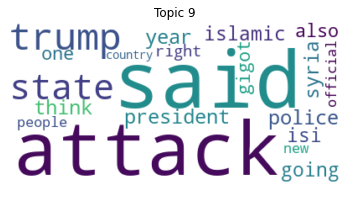

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate wordclouds for each topic
for topic_num in range(lda_model.num_topics):
    words = dict(lda_model.show_topic(topic_num, topn=20))
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Topic {}".format(topic_num))
    plt.show()
